In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import xgboost as xgb
from sklearn.metrics import accuracy_score
import os

In [97]:
path=os.path.abspath('..')
data=pd.read_csv(path+'\\data\\data.csv')
y=data['AdoptionSpeed']
data=data.drop('AdoptionSpeed',axis=1)
data.drop(data.columns[-9:-1],axis=1,inplace=True)

In [98]:
X_train_des, X_test_des, y_train_des, y_test_des = train_test_split(data, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.drop(data.columns[-51:-1],axis=1), y, test_size=0.25, random_state=42)

## with description

In [99]:
plt.rcParams["figure.figsize"] = (10, 14)

/Users/michelle/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.4241130968258202


/Users/michelle/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6006759160441124


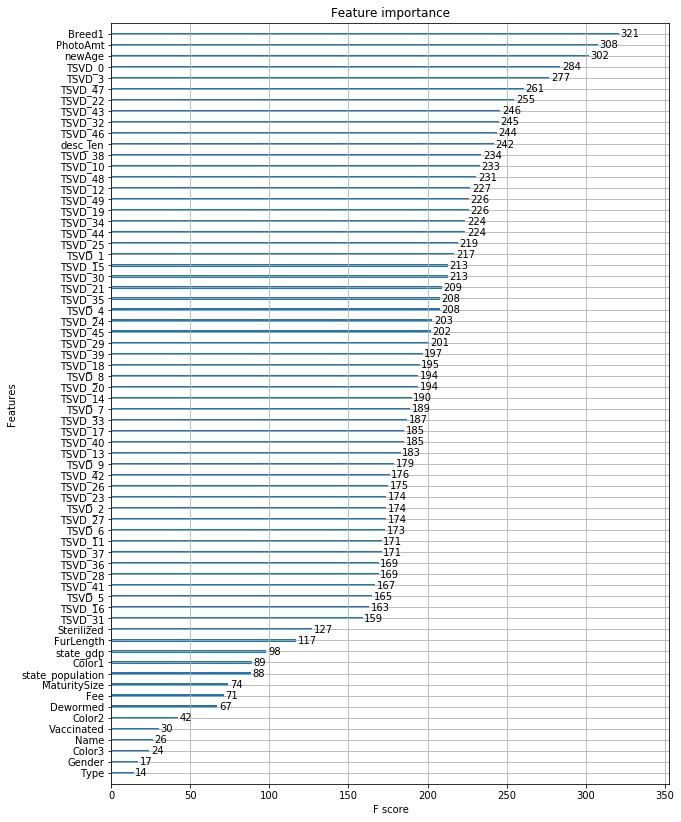

In [117]:
xg_des=xgb.XGBClassifier(
        max_depth=5,
        reg_alpha=2,
        reg_lambda=12,
        learning_rate=0.07,
        n_estimators=100,
        objective='multi:softmax',
        num_class=5,
        nthread=-1,
        gamma=0.1,
        min_child_weight=5,
        max_delta_step=0,
        subsample=0.8,
        colsample_bytree=0.8,
        colsample_bylevel=0.9,
        scale_pos_weight=1,
        seed=1440,
        missing=None)

bst = xg_des.fit(X_train_des,y_train_des)
print(accuracy_score(y_test_des,xg_des.predict(X_test_des)))
print(accuracy_score(y_train_des,xg_des.predict(X_train_des)))
xgb.plot_importance(xg_des)

## without description

/Users/michelle/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.40784209122432646


/Users/michelle/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6043223052294557


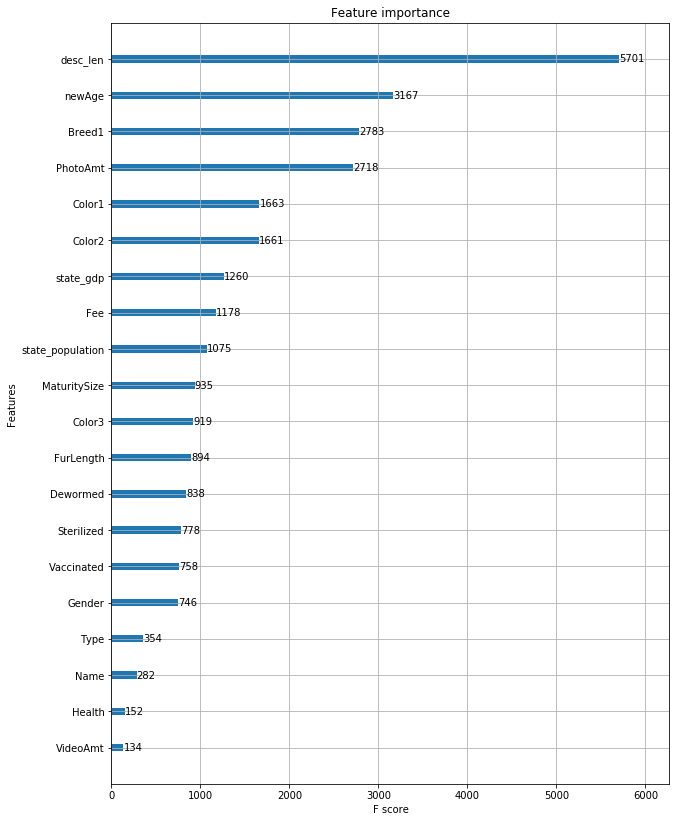

In [118]:
xg=xgb.XGBClassifier(
        max_depth=7,
        reg_alpha=0,
        reg_lambda=7,
        learning_rate=0.1,
        n_estimators=100,
        objective='multi:softmax',
        num_class=5,
        nthread=-1,
        gamma=0.1,
        min_child_weight=3,
        max_delta_step=0,
        subsample=0.7,
        colsample_bytree=0.8,
        colsample_bylevel=0.9,
        scale_pos_weight=1,
        seed=1440,
        missing=None)

bst = xg.fit(X_train,y_train)
print(accuracy_score(y_test,xg.predict(X_test)))
print(accuracy_score(y_train,xg.predict(X_train)))
xgb.plot_importance(xg)